<a href="https://colab.research.google.com/github/Aaditree/IndicRecognition/blob/master/CurrentModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [9]:
import tensorflow as tf
classifier= Sequential()

classifier.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', input_shape=(40,40,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))

classifier.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', input_shape=(40,40,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))

classifier.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=(40,40,3)))
classifier.add(MaxPooling2D(pool_size=(2,2)))
classifier.add(Dropout(0.2))


classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(40,40,3)))
classifier.add(Dropout(0.2))


classifier.add(Flatten())

classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.2))

classifier.add(Dense(units=9, activation='softmax'))

classifier.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])




In [10]:
ImageFile.LOAD_TRUNCATED_IMAGES= True

In [11]:
train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train', target_size = (40, 40), 
                                                 batch_size = 32, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test', target_size = (40, 40), 
                                                 batch_size = 32, class_mode = 'categorical')

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/utils.py:179: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn('Using ".tiff" files with multiple bands '


Found 18270 images belonging to 9 classes.
Found 7200 images belonging to 9 classes.


In [12]:
classifier.fit_generator(training_set, steps_per_epoch = 100, epochs = 30, validation_data = test_set, validation_steps = 25)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 2188s 22s/step - loss: 1.7820 - accuracy: 0.2933 - val_loss: 0.8821 - val_accuracy: 0.6275
Epoch 2/30
100/100 [==============================] - 1810s 18s/step - loss: 0.8176 - accuracy: 0.7087 - val_loss: 0.9604 - val_accuracy: 0.5638
Epoch 3/30
100/100 [==============================] - 1472s 15s/step - loss: 0.6634 - accuracy: 0.7621 - val_loss: 0.6506 - val_accuracy: 0.6862
Epoch 4/30
100/100 [==============================] - 1251s 13s/step - loss: 0.5371 - accuracy: 0.8059 - val_loss: 0.6705 - val_accuracy: 0.6900
Epoch 5/30
100/100 [==============================] - 1057s 11s/step - loss: 0.4048 - accuracy: 0.8662 - val_loss: 0.5242 - val_accuracy: 0.8500
Epoch 6/30
100/100 [==============================] - 891s 9s/step - loss: 0.2736 - accuracy: 0.9084 - val_loss: 1.5019 - val_accuracy: 0.5925
Epoch 7/30
100/100 [==============================] - 758s 8s/step - loss: 0.2948 - accuracy: 0.9022 - val_loss: 0.1733 - val_accura

In [13]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 38, 38, 256)       7168      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 19, 19, 256)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 17, 17, 128)       295040    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 6, 6, 64)          73792     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 3, 3, 64)         

In [29]:
classifier_json = classifier.to_json()

with open("CNNRecog.json","w") as json_file:
  json_file.write(classifier_json)
 

In [30]:
classifier.save_weights("CNNRecog.h5")

In [31]:
training_set.class_indices

{'bangla': 0,
 'devnagri': 1,
 'gujarati': 2,
 'gurumukhi': 3,
 'kannada': 4,
 'malayalam': 5,
 'odia': 6,
 'tamil': 7,
 'urdu': 8}

{'bangla': 0,
 'devnagri': 1,
 'gujarati': 2,
 'gurumukhi': 3,
 'kannada': 4,
 'malayalam': 5,
 'odia': 6,
 'tamil': 7,
 'urdu': 8}

In [32]:

def determine_character(result):

  if result == 0:
    print('prediction: Bangla')
  elif result == 1:
    print('prediction: Devanagri')
  elif result == 2:
    print('prediction: Gujarati')
  elif result == 3:
    print('prediction: Gurumukhi')
  elif result == 4:
    print('prediction: Kannada')
  elif result == 5:
    print('prediction: Malayalam')
  elif result == 6:
    print('prediction: Odia')
  elif result == 7:
    print('prediction: Tamil')
  elif result == 8:
    print('prediction: Urdu')
    


    




prediction: Kannada


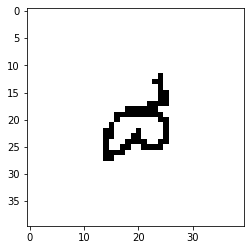

prediction: Kannada


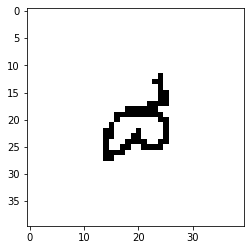

In [33]:
import numpy as np
from keras.preprocessing import image
from PIL import Image

def single_prediction(test_img):

  test_img_arr = image.img_to_array(test_img)
  test_img_arr = np.expand_dims(test_img_arr, axis=0)
  prediction = classifier.predict(test_img_arr)
  result = np.argmax(prediction, axis=1)
  determine_character(result)

#images = image.load_img('/content/urdu.jpg')
#plt.imshow(images)
#new_image = images.resize((40, 40))

test_img= image.load_img('/content/16c1.png', target_size = (40, 40, 3))
single_prediction(test_img)
import matplotlib.pyplot as plt

plt.imshow(test_img)

In [34]:
test_score = classifier.evaluate_generator(test_set, 32)
 #accuracy score

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


In [35]:
test_score

[0.4209439754486084, 0.8916015625]

[0.3178340196609497, 0.92578125]

In [36]:
score = classifier.evaluate_generator(test_set, 5, workers=12)

scores = classifier.predict_generator(test_set, 5, workers=12)

print(" Total: ", len(test_set.filenames))
print("Loss: ", score[0], "Accuracy: ", score[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


 Total:  7200
Loss:  0.3224131166934967 Accuracy:  0.90625


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


 Total:  7200
Loss:  0.2574092745780945 Accuracy:  0.918749988079071


prediction: Kannada


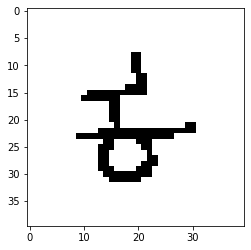

prediction: Kannada


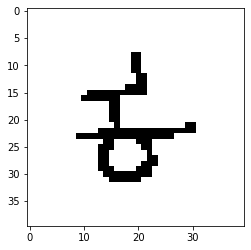

In [37]:
test_img= image.load_img('/content/5c2.png', target_size = (40, 40, 3))
single_prediction(test_img)
import matplotlib.pyplot as plt

plt.imshow(test_img)

prediction: Kannada


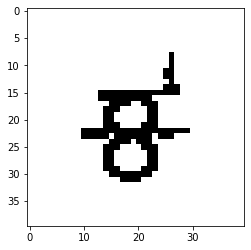

prediction: Kannada


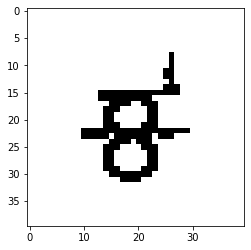

In [38]:
test_img= image.load_img('/content/7c1.png', target_size = (40, 40, 3))
single_prediction(test_img)
import matplotlib.pyplot as plt

plt.imshow(test_img)

prediction: Tamil


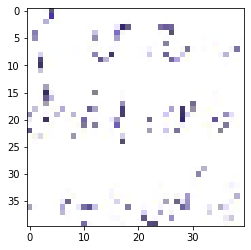

prediction: Tamil


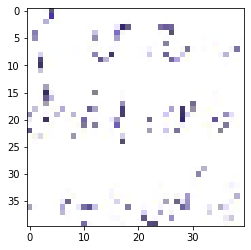

In [39]:
test_img= image.load_img('/content/U.jpg', target_size = (40, 40, 3))
single_prediction(test_img)
import matplotlib.pyplot as plt

plt.imshow(test_img)

prediction: Tamil


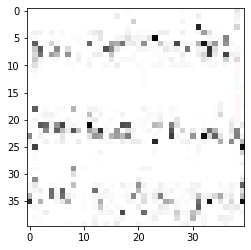

prediction: Tamil


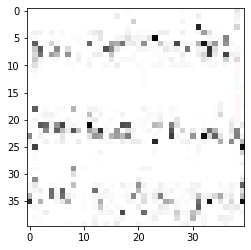

In [40]:
test_img= image.load_img('/content/guj1.jpg', target_size = (40, 40, 3))
single_prediction(test_img)
import matplotlib.pyplot as plt

plt.imshow(test_img)


prediction: Devanagri


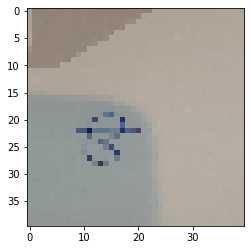

prediction: Devanagri


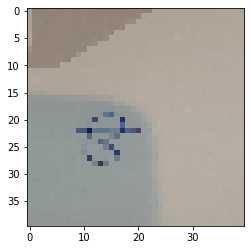

In [41]:
test_img= image.load_img('/content/g.jpeg', target_size = (40, 40, 3))
single_prediction(test_img)
import matplotlib.pyplot as plt

plt.imshow(test_img)

prediction: Bangla


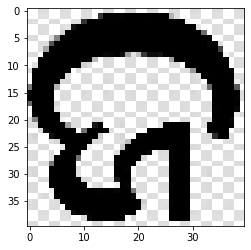

prediction: Bangla


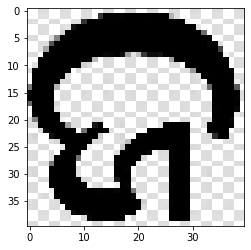

In [42]:
test_img= image.load_img('/content/o1.jpg', target_size = (40, 40, 3))
single_prediction(test_img)
import matplotlib.pyplot as plt

plt.imshow(test_img)

prediction: Bangla


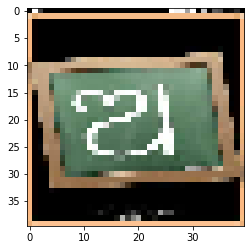

prediction: Bangla


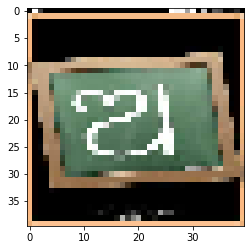

In [43]:
test_img= image.load_img('/content/oo.jpg', target_size = (40, 40, 3))
single_prediction(test_img)
import matplotlib.pyplot as plt

plt.imshow(test_img)